PSNR = 31.162270


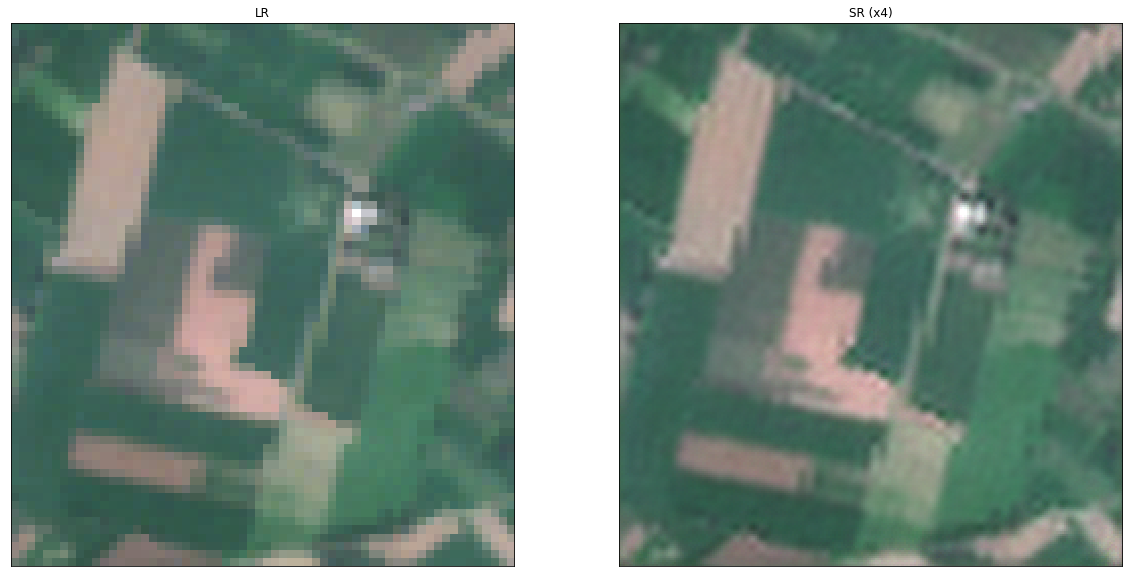

In [5]:
from models import resolve_single
from models.edsr import edsr
from models.common import evaluate

from utils import load_image, plot_sample

from data import drone_data

valid_loader = drone_data(subset='valid')
valid_ds = valid_loader.dataset(batch_size=1, repeat_count=1)

sat_img_path = f'satellite_rgb/Subset_projected_S2B_MSIL2A_20190306T052709_N0211_R105_T43RGP_20190306T101639.png'

model = edsr(scale=4, num_res_blocks=16)
model.load_weights('weights/edsr-16-x4/weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(model, lr)
plot_sample(lr, sr)

psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 31.551722


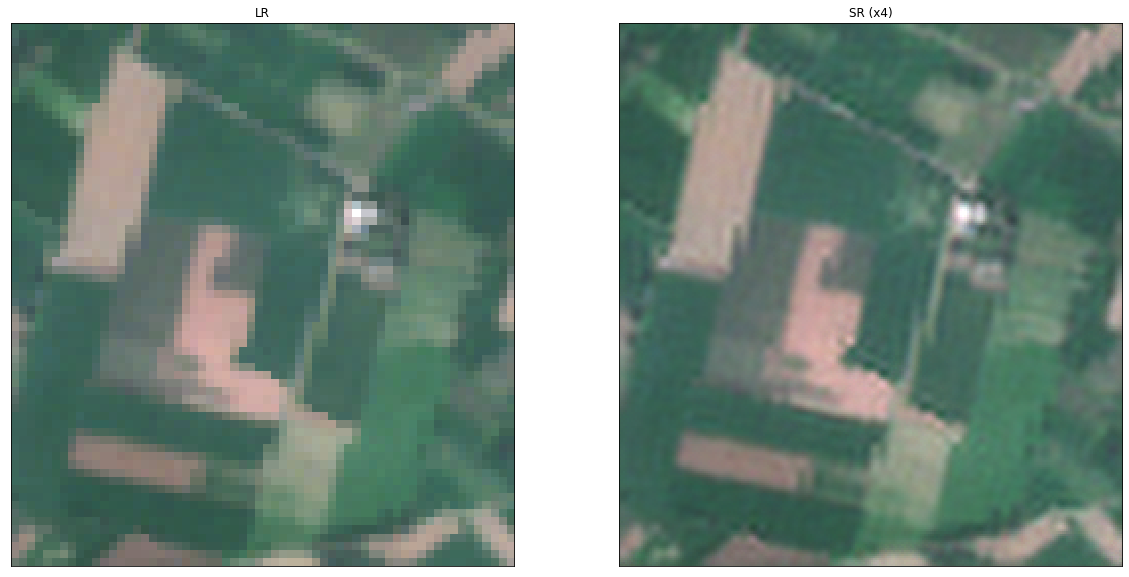

In [6]:
from models.wdsr import wdsr_b

model = wdsr_b(scale=4, num_res_blocks=32)
model.load_weights('weights/wdsr-b-32-x4/weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(model, lr)

plot_sample(lr, sr)

psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 25.019272


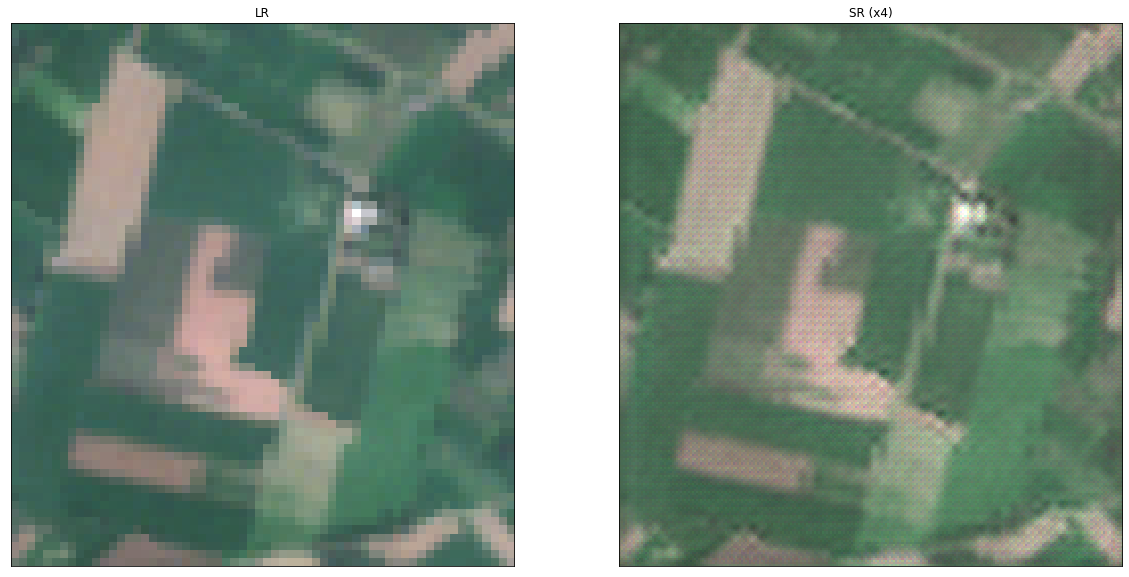

In [7]:
model = edsr(scale=4, num_res_blocks=16)
model.load_weights('weights/edsr-16-x4/finetuned_weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(model, lr)
plot_sample(lr, sr)

psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 29.712622


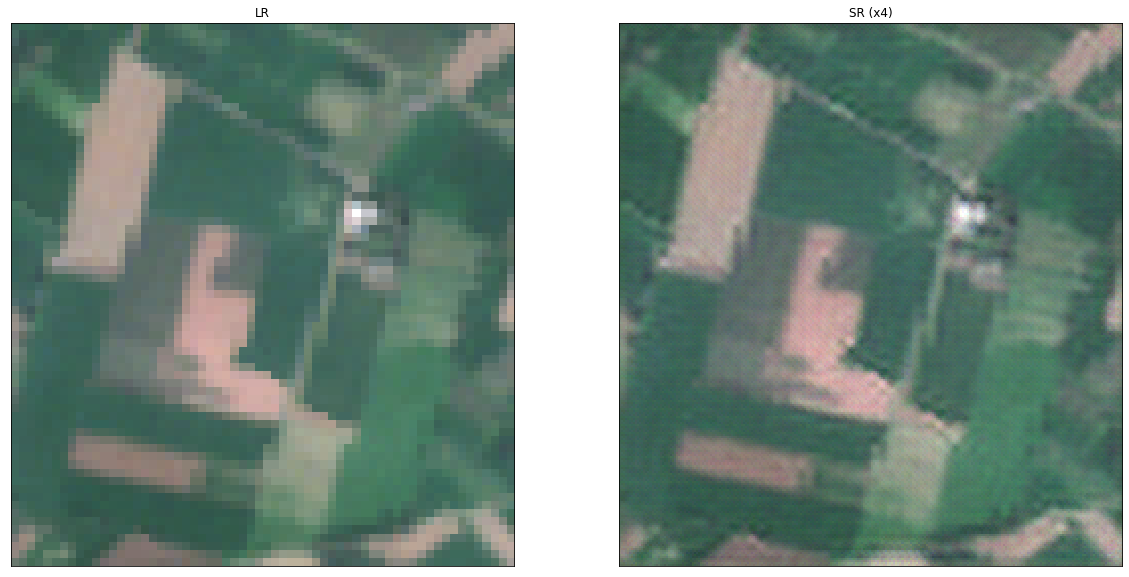

In [9]:
model = wdsr_b(scale=4, num_res_blocks=32)
model.load_weights('weights/wdsr-b-32-x4/finetuned_weights.h5')

lr = load_image(sat_img_path)
sr = resolve_single(model, lr)

plot_sample(lr, sr)

psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

In [6]:
from models.srgan import generator, discriminator

pre_generator = generator()
gan_generator = generator()
pre_generator.load_weights('weights/srgan/pre_generator.h5')
gan_generator.load_weights('weights/srgan/gan_generator.h5')

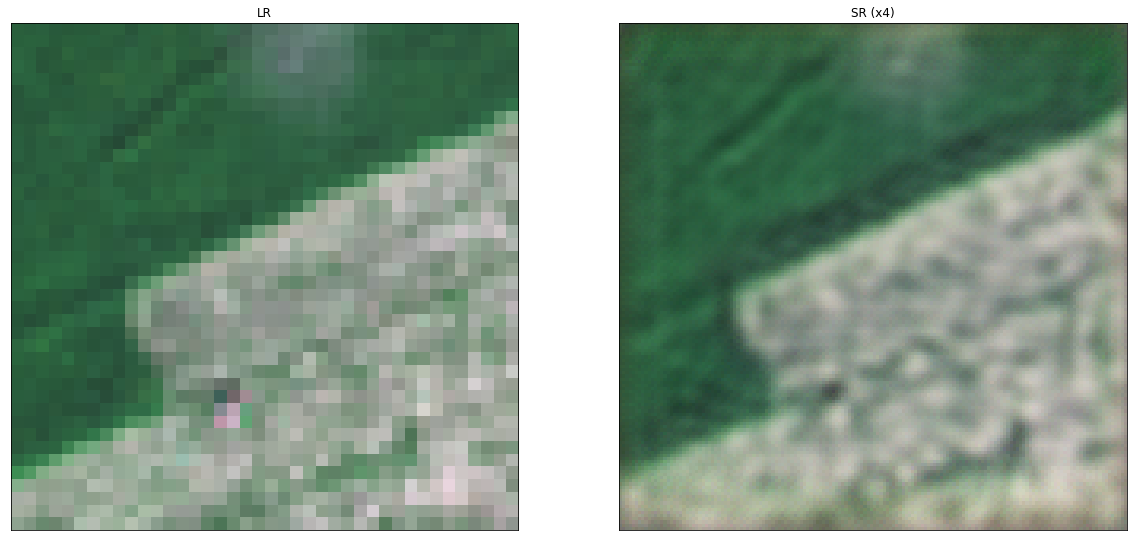

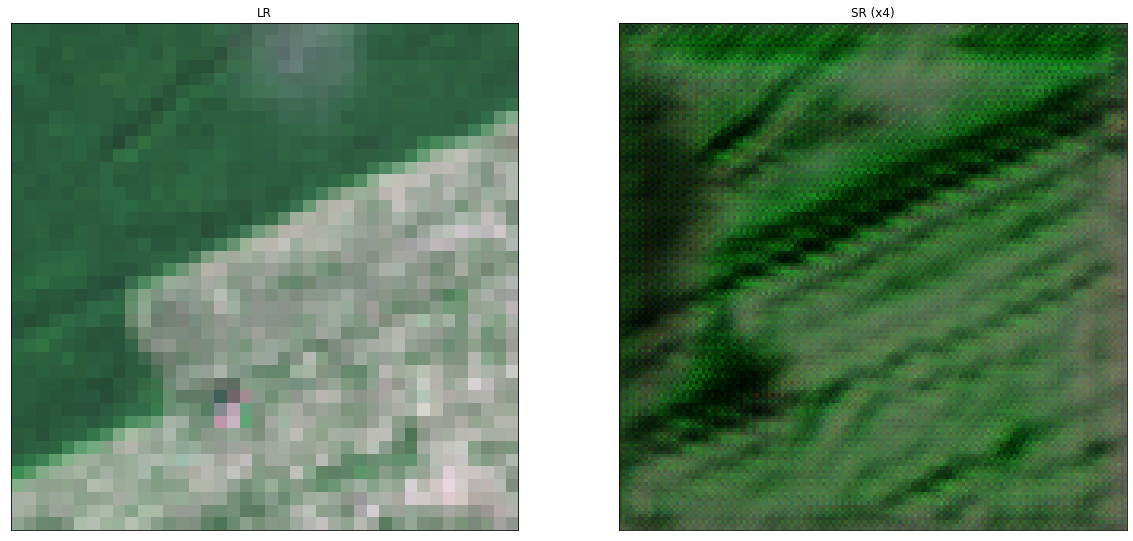

In [7]:
def resolve_and_plot(model, img_path):
    lr = load_image(img_path)
    sr = resolve_single(model, lr)

    plot_sample(lr, sr)

img_path = 'data/drone_rgb_lr/12123_04.png'
resolve_and_plot(pre_generator, img_path=img_path)
resolve_and_plot(gan_generator, img_path=img_path)

# Pre trained weights downloaded from Github

PSNR = 31.875845
PSNR = 27.563601


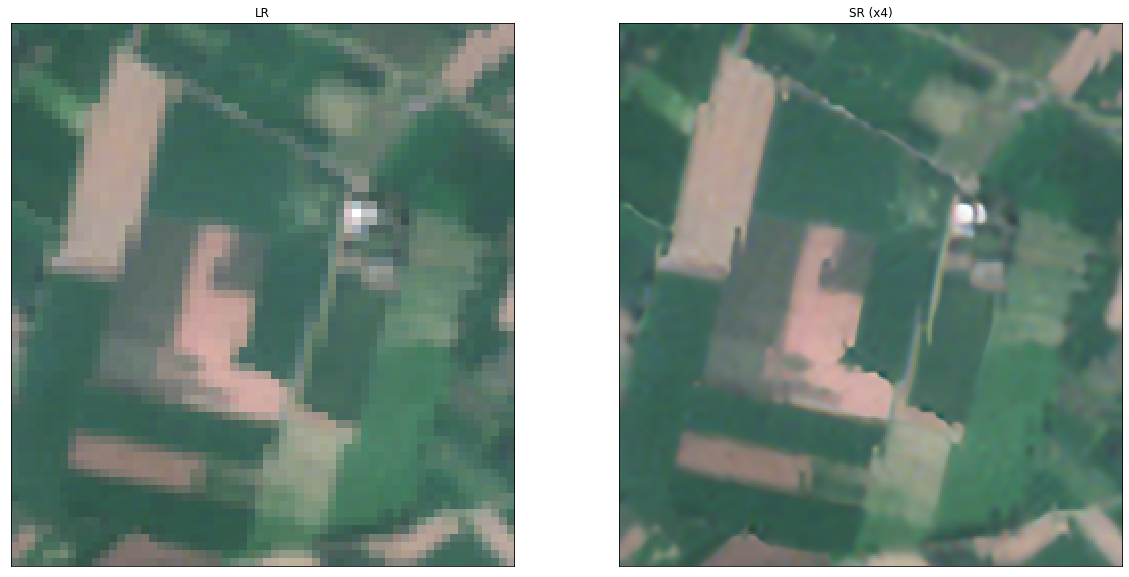

In [10]:
model = edsr(scale=4, num_res_blocks=16)
model.load_weights('weights/weights/article/weights-edsr-16-x4.h5')

lr = load_image(sat_img_path)
sr = resolve_single(model, lr)
plot_sample(lr, sr)

psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

model.load_weights('weights/weights/article/weights-edsr-16-x4-fine-tuned.h5')
psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

PSNR = 31.875605
PSNR = 28.385813


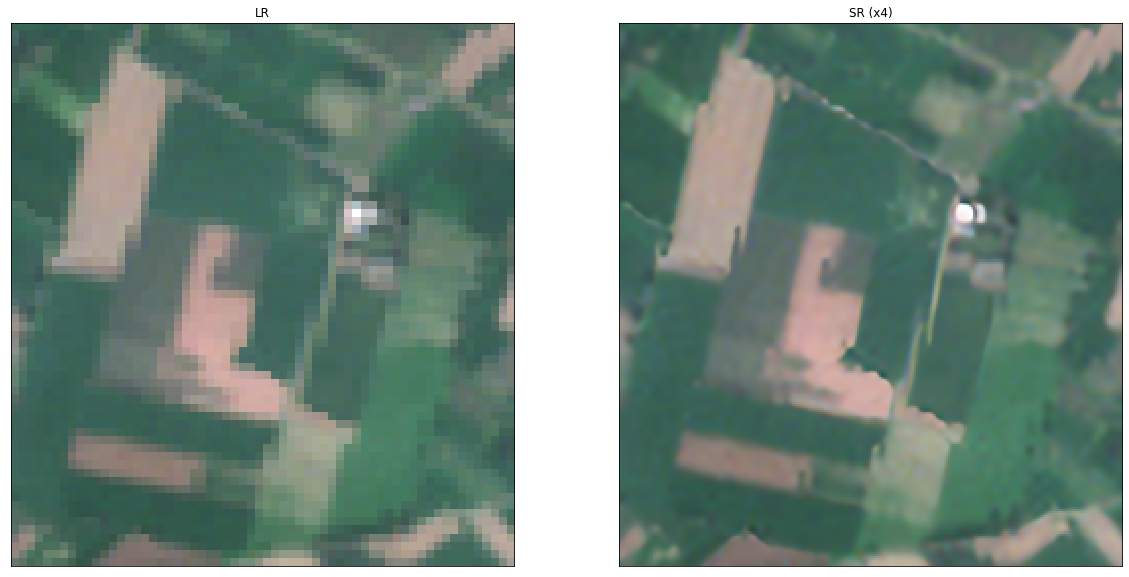

In [11]:
model = wdsr_b(scale=4, num_res_blocks=32)
model.load_weights('weights/weights/article/weights-wdsr-b-32-x4.h5')

lr = load_image(sat_img_path)
sr = resolve_single(model, lr)
plot_sample(lr, sr)

psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')

model.load_weights('weights/weights/article/weights-wdsr-b-32-x4-fine-tuned.h5')
psnr = evaluate(model, valid_ds)
print(f'PSNR = {psnr.numpy():3f}')